In [3]:
import librosa
(burn_target, rate) = librosa.load("demo/target/Burn-3.wav", sr=None)
(legend_target, rate) = librosa.load("demo/target/Legends-3.wav", sr=None)
(burn_output, rate) = librosa.load("demo/output/Burn-1_Change.wav", sr=None)
(legend_output, rate) = librosa.load("demo/output/Legends-2_Change.wav", sr=None)

Text(0.5, 1.0, 'Legends Target')

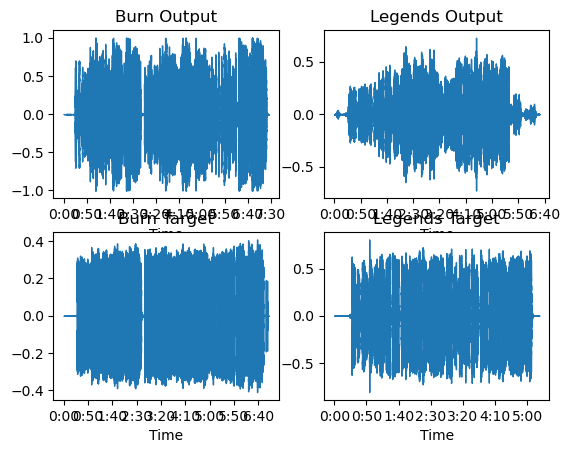

In [14]:
import librosa.display
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
librosa.display.waveshow(burn_output)
plt.title("Burn Output")
plt.subplot(2,2,2)
librosa.display.waveshow(legend_output)
plt.title("Legends Output")
plt.subplot(2,2,3)
librosa.display.waveshow(burn_target)
plt.title("Burn Target")
plt.subplot(2,2,4)
librosa.display.waveshow(legend_target)
plt.title("Legends Target")

Text(0.5, 1.0, 'Legends Target')

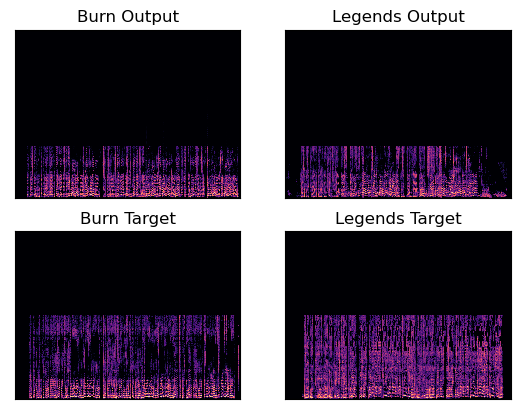

In [16]:
import numpy as np
plt.subplot(2,2,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(burn_output)), ref=np.max))
plt.title("Burn Output")
plt.subplot(2,2,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(legend_output)), ref=np.max))
plt.title("Legends Output")
plt.subplot(2,2,3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(burn_target)), ref=np.max))
plt.title("Burn Target")
plt.subplot(2,2,4)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(legend_target)), ref=np.max))
plt.title("Legends Target")

In [18]:
print(len(burn_output), len(burn_target))

9834496 9296896


In [19]:
print(len(legend_output), len(legend_target))

8593407 7024640


In [22]:
def get_start(wav):
    for i in range(len(wav)):
        if wav[i] != 0:
            print(i)
            return i
get_start(legend_output)
get_start(legend_target)
get_start(burn_output)
get_start(burn_target)

8145
54366
138730
230627


230627

In [26]:
def cutwav(wav):
    return wav[get_start(wav):]
len(cutwav(legend_output))

8145


8585262

In [24]:
def padarray(A, size):
    t = size - len(A)
    return np.pad(A, pad_width=(0, t), mode='constant')
len(padarray(burn_target, len(burn_output)))==len(burn_output)

True

In [27]:
from sklearn.metrics import mean_squared_error
cut_legend_out = cutwav(legend_output)
cut_burn_out = cutwav(burn_output)
cut_legend_target = cutwav(legend_target)
cut_burn_target = cutwav(burn_target)
print("Burn", mean_squared_error(cut_burn_out, padarray(cut_burn_target, len(cut_burn_out))))
print("Legends", mean_squared_error(cut_legend_out, padarray(cut_legend_target, len(cut_legend_out))))

8145
138730
54366
230627
Burn 0.044556264
Legends 0.028168676


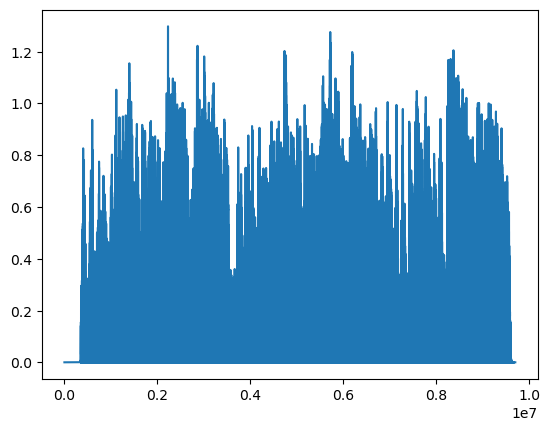

In [29]:
plt.plot(abs(cut_burn_out - padarray(cut_burn_target, len(cut_burn_out))))